In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings(action="ignore")

## 3.5 (실습) 기상청 종합 데이터 분석

### 3.5.1 데이터 불러오기

In [80]:
data = pd.read_csv("../data/weather.csv" , encoding = "cp949")
df = data
df

,지점,지점명,일시,평균기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균상대습도(%),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량 나타난날(yyyymmdd),평균풍속(m/s),합계 일조시간(hr),최심적설(cm)
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,0.0,19680102.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.0,19680210.0,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,3.3,NaN,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,3.4,19680405.0,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,31.8,19680518.0,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54435,295,남해,2021-08,26.1,35.5,20.7,1003.2,82.0,473.2,185.7,20210821.0,1.3,174.5,NaN
54436,295,남해,2021-09,22.2,30.1,16.3,1008.1,82.0,164.6,56.2,20210929.0,1.5,95.2,NaN
54437,295,남해,2021-10,17.2,28.9,4.7,1015.3,74.0,43.6,18.2,20211010.0,1.3,203.2,NaN
54438,295,남해,2021-11,10.7,21.7,1.4,1014.2,67.0,53.5,31.3,NaN,1.6,178.9,NaN


### 3.5.2. 데이터 가공

#### - 칼럼명 변경 

In [81]:
df.columns = ['지점','지점명','연월','평균기온','최고기온','최저기온','평균기압','평균상대습도','월합강수량','일최다강수량','최대날','평균풍속','일조시간','최심적설']
df

,지점,지점명,연월,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,일최다강수량,최대날,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,0.0,19680102.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.0,19680210.0,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,3.3,NaN,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,3.4,19680405.0,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,31.8,19680518.0,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54435,295,남해,2021-08,26.1,35.5,20.7,1003.2,82.0,473.2,185.7,20210821.0,1.3,174.5,NaN
54436,295,남해,2021-09,22.2,30.1,16.3,1008.1,82.0,164.6,56.2,20210929.0,1.5,95.2,NaN
54437,295,남해,2021-10,17.2,28.9,4.7,1015.3,74.0,43.6,18.2,20211010.0,1.3,203.2,NaN
54438,295,남해,2021-11,10.7,21.7,1.4,1014.2,67.0,53.5,31.3,NaN,1.6,178.9,NaN


#### - 사용할 칼럼 선택

In [82]:
df = df[['지점','지점명','연월','평균기온','최고기온','최저기온','평균기압','평균상대습도','월합강수량','평균풍속','일조시간','최심적설']]
df

,지점,지점명,연월,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
54435,295,남해,2021-08,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN
54436,295,남해,2021-09,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN
54437,295,남해,2021-10,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN
54438,295,남해,2021-11,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN


#### - 데이터의 기본 정보 확인

In [5]:
# 데이터 타입, 결측값 개수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54440 entries, 0 to 54439
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      54440 non-null  int64  
 1   지점명     54440 non-null  object 
 2   연월      54440 non-null  object 
 3   평균기온    53807 non-null  float64
 4   최고기온    54237 non-null  float64
 5   최저기온    54212 non-null  float64
 6   평균기압    51997 non-null  float64
 7   평균상대습도  53241 non-null  float64
 8   월합강수량   54150 non-null  float64
 9   평균풍속    53282 non-null  float64
 10  일조시간    53055 non-null  float64
 11  최심적설    11895 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.0+ MB


In [6]:
# 기초통계량
df.describe()

,지점,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
count,54440.000000,53807.000000,54237.000000,54212.000000,51997.000000,53241.000000,54150.000000,53282.000000,53055.000000,11895.000000
mean,186.670206,12.628870,24.317525,2.028311,1005.837291,69.885971,110.341457,2.331489,188.699729,8.191148
std,62.080291,9.152594,8.020697,10.765043,16.180945,9.838686,120.815806,1.294391,46.280604,14.853678
min,90.000000,-13.500000,-4.800000,-32.600000,911.800000,8.000000,0.000000,-0.400000,0.000000,0.000000
25%,133.000000,4.600000,17.900000,-6.500000,1001.200000,63.000000,30.700000,1.400000,158.700000,1.500000
50%,170.000000,13.200000,25.800000,1.300000,1008.600000,71.000000,68.100000,2.000000,189.300000,4.300000
75%,245.000000,20.900000,31.100000,11.400000,1015.900000,77.000000,145.900000,2.900000,219.300000,9.000000
max,295.000000,30.200000,41.000000,24.800000,1029.700000,99.000000,1364.200000,22.700000,1300.300000,293.600000


In [7]:
# 일부 칼럼의 데이터만 출력
df.describe()["평균기온"]

df.describe()[["평균기온","최고기온","최저기온"]]

,평균기온,최고기온,최저기온
count,53807.000000,54237.000000,54212.000000
mean,12.628870,24.317525,2.028311
std,9.152594,8.020697,10.765043
min,-13.500000,-4.800000,-32.600000
25%,4.600000,17.900000,-6.500000
50%,13.200000,25.800000,1.300000
75%,20.900000,31.100000,11.400000
max,30.200000,41.000000,24.800000


#### - 칼럼 추가
- 맨 뒤에 추가

In [83]:
df["신규"] = df["지점"]
df.head(2)

,지점,지점명,연월,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,신규
0,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


- 특정 위치에 추가
    - DataFrame.insert(loc, column, value, allow_duplicates=False)

In [84]:
df.insert(1,"지점2",df["지점"])
df

,지점,지점2,지점명,연월,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,신규
0,90,90,속초,1968-01,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,90,속초,1968-02,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90
2,90,90,속초,1968-03,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0,90
3,90,90,속초,1968-04,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN,90
4,90,90,속초,1968-05,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54435,295,295,남해,2021-08,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN,295
54436,295,295,남해,2021-09,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN,295
54437,295,295,남해,2021-10,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN,295
54438,295,295,남해,2021-11,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN,295


##### Quiz
- 연도 추가 해보기

In [85]:
df.insert(4,"연도",df["연월"].str[0:4])
df.head(2)

,지점,지점2,지점명,연월,연도,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설,신규
0,90,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN,90
1,90,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8,90


- 일부 칼럼의 값 일치 여부 확인

In [11]:
df["연도"].str.contains("1968")

0         True
1         True
2         True
3         True
4         True
         ...  
54435    False
54436    False
54437    False
54438    False
54439    False
Name: 연도, Length: 54440, dtype: bool

#### - 칼럼 삭제
- DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

In [86]:
df.drop(columns = ['지점2',"신규"], axis = 1, inplace = True) # axis = 0 : 행, axis = 1 : 열
df

,지점,지점명,연월,연도,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54435,295,남해,2021-08,2021,26.1,35.5,20.7,1003.2,82.0,473.2,1.3,174.5,NaN
54436,295,남해,2021-09,2021,22.2,30.1,16.3,1008.1,82.0,164.6,1.5,95.2,NaN
54437,295,남해,2021-10,2021,17.2,28.9,4.7,1015.3,74.0,43.6,1.3,203.2,NaN
54438,295,남해,2021-11,2021,10.7,21.7,1.4,1014.2,67.0,53.5,1.6,178.9,NaN


#### - 특정 데이터 검색하기

In [13]:
set(df["지점명"])

{'강릉',
 '강진군',
 '강화',
 '거제',
 '거창',
 '경주시',
 '고산',
 '고창',
 '고창군',
 '고흥',
 '관악산',
 '광양시',
 '광주',
 '구미',
 '군산',
 '금산',
 '김해시',
 '남원',
 '남해',
 '대관령',
 '대구',
 '대구(기)',
 '대전',
 '동두천',
 '동해',
 '목포',
 '무안',
 '문경',
 '밀양',
 '백령도',
 '보령',
 '보성군',
 '보은',
 '봉화',
 '부산',
 '부안',
 '부여',
 '북강릉',
 '북창원',
 '북춘천',
 '산청',
 '삼척',
 '상주',
 '서귀포',
 '서산',
 '서울',
 '성산',
 '성산포',
 '세종',
 '속초',
 '수원',
 '순창군',
 '순천',
 '안동',
 '양산시',
 '양평',
 '여수',
 '영광군',
 '영덕',
 '영월',
 '영주',
 '영천',
 '완도',
 '울릉도',
 '울산',
 '울진',
 '원주',
 '의령군',
 '의성',
 '이천',
 '인제',
 '인천',
 '임실',
 '장수',
 '장흥',
 '전주',
 '정선군',
 '정읍',
 '제주',
 '제천',
 '주암',
 '진도(첨찰산)',
 '진도군',
 '진주',
 '창원',
 '천안',
 '철원',
 '청송군',
 '청주',
 '추풍령',
 '춘천',
 '충주',
 '태백',
 '통영',
 '파주',
 '포항',
 '함양군',
 '합천',
 '해남',
 '홍성',
 '홍천',
 '흑산도'}

In [14]:
# 인덱싱 이용
df[df["지점명"] == "속초"]

# 쿼리 이용
df.query("지점명 == '속초'")

# 인덱스명으로 추출
df.index[df["지점명"] == "속초"]

# 이중 조건
df[(df["지점명"] == "속초") | (df["지점명"] == "강릉")]

,지점,지점명,연월,연도,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
0,90,속초,1968-01,1968,-0.7,11.4,-11.4,1018.2,47.0,0.0,2.1,218.6,NaN
1,90,속초,1968-02,1968,-2.1,9.7,-9.9,1022.8,51.0,3.3,2.2,236.5,1.8
2,90,속초,1968-03,1968,5.9,20.5,-3.2,1016.1,57.0,8.8,2.1,223.7,0.0
3,90,속초,1968-04,1968,10.5,21.4,4.0,1019.4,63.0,6.9,2.0,255.7,NaN
4,90,속초,1968-05,1968,14.6,24.5,9.3,1011.7,74.0,49.1,2.2,187.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,105,강릉,2021-08,2021,25.5,36.5,18.4,1006.0,77.0,438.1,1.8,72.9,NaN
4653,105,강릉,2021-09,2021,21.7,29.6,15.8,1011.8,77.0,111.6,1.7,134.2,NaN
4654,105,강릉,2021-10,2021,16.5,32.3,2.7,1017.9,70.0,130.9,1.9,159.1,NaN
4655,105,강릉,2021-11,2021,11.1,22.2,-0.2,1014.4,52.0,13.1,2.6,197.5,NaN


##### Quiz
- 쿼리 이용해서 년원 중 최고 최소값 구하기

In [15]:
df.query("연월 == 연월.min() | 연월 == 연월.max()")

,지점,지점명,연월,연도,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
647,90,속초,2021-12,2021,2.8,13.9,-14.9,1019.6,47.0,68.7,2.2,219.8,NaN
710,93,북춘천,2021-12,2021,-2.2,11.4,-17.2,1013.4,72.0,5.2,1.1,173.8,6.4
1118,95,철원,2021-12,2021,-2.1,11.1,-18.0,1006.2,76.0,4.9,1.1,177.3,NaN
1406,98,동두천,2021-12,2021,-1.1,12.8,-17.3,1011.1,66.0,8.3,1.4,185.1,NaN
1646,99,파주,2021-12,2021,-1.9,12.3,-18.7,1022.4,71.0,5.8,1.2,193.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52058,285,합천,2021-12,2021,2.4,15.6,-11.0,1020.6,62.0,1.2,0.9,184.9,NaN
52647,288,밀양,2021-12,2021,2.8,15.4,-9.3,1022.6,58.0,3.0,1.2,202.8,NaN
53243,289,산청,2021-12,2021,2.1,14.8,-10.7,1007.9,62.0,1.7,2.7,154.8,NaN
53840,294,거제,2021-12,2021,5.3,16.4,-6.6,1018.8,59.0,5.0,1.4,181.3,NaN


- 전체 (또는 강릉)에서 가장 더웠던(추웠던) 해와 기온은?

In [16]:
print(f'강릉 가장 추웠던 연월 : {df[(df.지점명 == "강릉") & (df.최저기온 == df[df.지점명 == "강릉"].최저기온.min())]["연월"].to_string(index = False)}')
print(f'강릉 가장 추웠던 최저기온 : {df[df.지점명 == "강릉"].최저기온.min()}')
print(f'가장 더웠던 연월 : {df.query("최고기온 == 최고기온.max()").연월.to_string(index = False)}')
print(f'가장 더웠던 최고기온 : {df.query("최고기온 == 최고기온.max()").최고기온.to_string(index = False)}')

강릉 가장 추웠던 연월 :  1915-01
강릉 가장 추웠던 최저기온 : -20.2
가장 더웠던 연월 :  2018-08
가장 더웠던 최고기온 :  41.0


In [17]:
df[df.최고기온 == df.최고기온.max()].연월

34766    2018-08
Name: 연월, dtype: object

#### - 그룹화(group) 하기

In [18]:
df.groupby(df.지점명).mean()
df.groupby(df.지점명).max()

,지점,연월,연도,평균기온,최고기온,최저기온,평균기압,평균상대습도,월합강수량,평균풍속,일조시간,최심적설
지점명,,,,,,,,,,,,
강릉,105,2021-12,2021,28.5,39.4,20.9,1028.1,91.0,1137.0,8.9,325.7,138.1
강진군,259,2021-12,2021,27.8,37.4,21.7,1026.0,86.0,498.1,3.6,296.5,36.5
강화,201,2021-12,2021,26.7,35.8,20.3,1026.2,96.0,1069.0,3.0,374.2,30.3
거제,294,2021-12,2021,28.3,38.6,23.5,1029.1,92.0,1115.5,4.2,318.4,19.6
거창,284,2021-12,2021,27.7,37.8,21.0,999.9,89.0,838.0,2.5,315.4,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
합천,285,2021-12,2021,29.0,39.5,21.9,1028.3,89.0,814.5,2.7,323.6,24.8
해남,261,2021-12,2021,27.7,37.2,23.7,1025.6,94.0,724.2,3.4,343.2,38.5
홍성,177,2021-12,2021,27.6,37.0,21.3,1024.5,92.0,456.4,2.3,342.8,13.3


#### - grouby, agg 함수

In [34]:
df.groupby("지점명")["평균기온"].agg("mean")

지점명
강릉     12.551719
강진군    13.688194
강화     11.123810
거제     14.186565
거창     11.765476
         ...    
합천     13.025680
해남     13.407993
홍성     12.627027
홍천     10.532653
흑산도    13.564000
Name: 평균기온, Length: 102, dtype: float64

In [19]:
df.groupby("지점명")["평균기온"].agg(**{"평균기온" : "mean"})

,평균기온
지점명,
강릉,12.551719
강진군,13.688194
강화,11.123810
거제,14.186565
거창,11.765476
...,...
합천,13.025680
해남,13.407993
홍성,12.627027


In [33]:
df.groupby(["지점명","연도"])["평균기온"].agg(**{"평균기온" : "mean"})

평균기온
지점명 연도             
강릉  1911        NaN
    1912  11.733333
    1913  11.683333
    1914  13.175000
    1915  12.091667
...             ...
흑산도 2017  13.491667
    2018  13.825000
    2019  14.066667
    2020  14.100000
    2021  15.258333

[4561 rows x 1 columns]

##### Quiz
- 지점별, 년도별 일최다강수량은?

In [44]:
data.groupby(["지점명","연도"])["일최다강수량"].agg(**{"일최다강수량" : "max"})

일최다강수량
지점명 연도          
강릉  1911    36.5
    1912   160.4
    1913    76.8
    1914   121.3
    1915   132.8
...          ...
흑산도 2017    68.5
    2018   181.7
    2019    92.5
    2020    71.0
    2021   109.0

[4561 rows x 1 columns]

In [112]:
df.groupby(["지점명","연도"])["월합강수량","평균기온"].agg("mean")

월합강수량       평균기온
지점명 연도                         
강릉  1911   31.466667        NaN
    1912  114.325000  11.733333
    1913   79.175000  11.683333
    1914  108.416667  13.175000
    1915   96.583333  12.091667
...              ...        ...
흑산도 2017   62.241667  13.491667
    2018  126.350000  13.825000
    2019   89.925000  14.066667
    2020   98.933333  14.100000
    2021   76.625000  15.258333

[4561 rows x 2 columns]

#### - 인덱스 초기화

In [45]:
data.groupby(["지점명","연도"])["일최다강수량"].agg(**{"일최다강수량" : "max"}).reset_index()

,지점명,연도,일최다강수량
0,강릉,1911,36.5
1,강릉,1912,160.4
2,강릉,1913,76.8
3,강릉,1914,121.3
4,강릉,1915,132.8
...,...,...,...
4556,흑산도,2017,68.5
4557,흑산도,2018,181.7
4558,흑산도,2019,92.5
4559,흑산도,2020,71.0


#### Dataframe 구조 변경하기 : pivot()
- DataFrame.pivot(index=None, columns=None, values=None)

In [46]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [49]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [50]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [51]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

### 3.5.3. 데이터 시각화

#### - 데이터 시각화 1
- 관측 지점별 평균기온 그래프

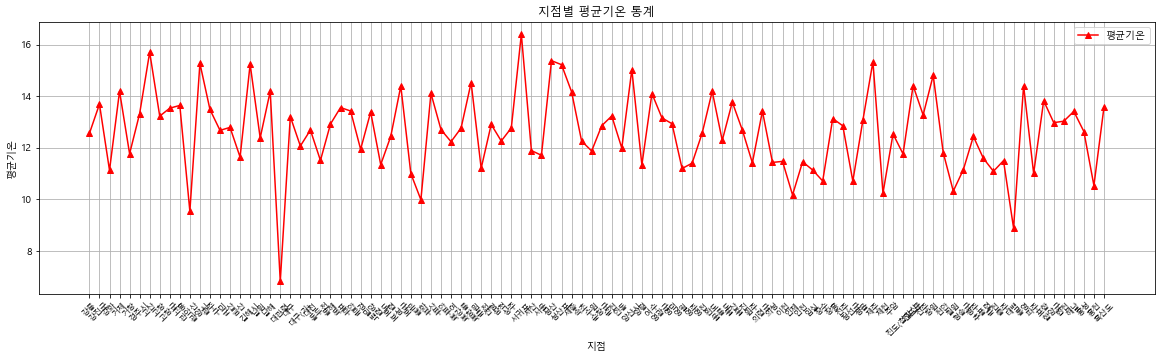

In [79]:
# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 5] 


# 데이터
df2 = df.groupby(["지점명"]).mean().iloc[:,0:2]
X = df2.index
Y = df2.평균기온

# 그래프
plt.plot(X,Y,"^",c = "r", linestyle = "solid", label = "평균기온")
plt.grid()
plt.title("지점별 평균기온 통계")
plt.xlabel("지점")
plt.ylabel("평균기온")
plt.xticks(fontsize = 8, rotation = 45)
plt.legend()
plt.show()

#### 데이터 시각화2
- 강릉 지역 년도별 평균기온(막대) & 최고기온(선) 그래프 그리기

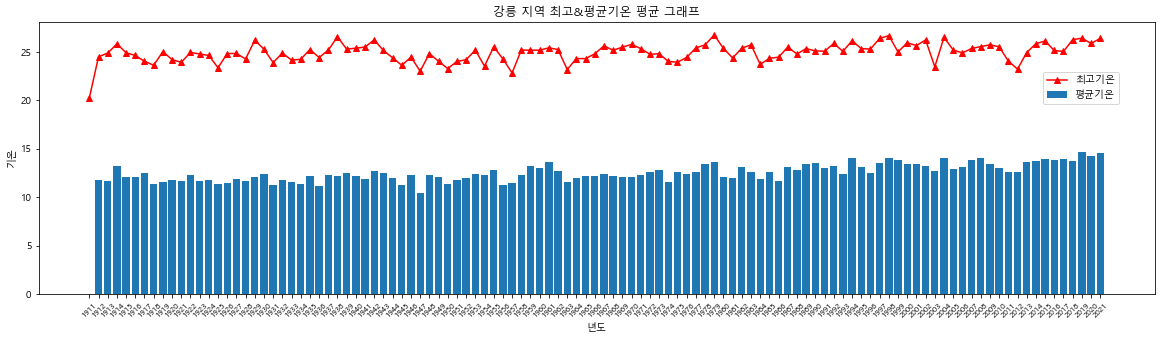

In [107]:
# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 5] 


# 데이터
df3 = df.groupby(["지점명","연도"]).mean().iloc[:,0:3].reset_index()
df3 = df3[df3.지점명 == "강릉"]
year = df3.연도
mean_tem = df3.평균기온
high_tem = df3.최고기온

# 그래프
plt.bar(year,mean_tem, label = "평균기온")
plt.plot(year,high_tem,"^",linestyle = "solid", label = "최고기온", c = "r")
plt.title("강릉 지역 최고&평균기온 평균 그래프")
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel("년도")
plt.ylabel("기온")
plt.legend(loc = (0.9,0.7))
plt.savefig("../output/graph5.png")
plt.show()

#### 데이터 시각화3
- 강릉 지역 연도별 최고/평균/최저기온 평균 그래프 그리기

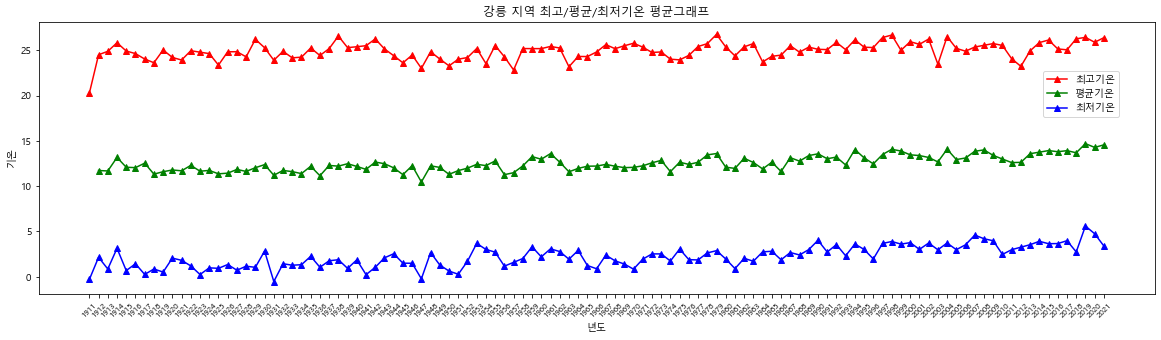

In [106]:
# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 5] 


# 데이터
df3 = df.groupby(["지점명","연도"]).mean().iloc[:,0:4].reset_index()
df3 = df3[df3.지점명 == "강릉"]
year = df3.연도
mean_tem = df3.평균기온
high_tem = df3.최고기온
low_tem = df3.최저기온

# 그래프
plt.plot(year,high_tem,"^",linestyle = "solid", label = "최고기온", c = "r")
plt.plot(year,mean_tem,"^",linestyle = "solid", label = "평균기온", c = "g")
plt.plot(year,low_tem,"^",linestyle = "solid", label = "최저기온", c = "b")
plt.title("강릉 지역 최고/평균/최저기온 평균그래프")
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel("년도")
plt.ylabel("기온")
plt.legend(loc = (0.9,0.65))
plt.show()

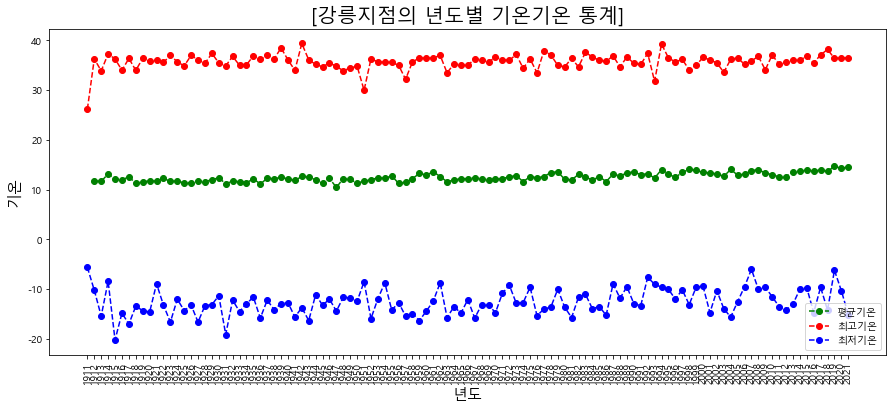

In [110]:
# 강사님 code
import pandas as pd
import matplotlib.pyplot as plt

# 한글,그래프크기
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,6))

data = df.query(" 지점명=='강릉' ")
data1 = data.groupby('연도')['평균기온'].agg(**{'평균기온':'mean'})
data2 = data.groupby('연도')['최고기온'].agg(**{'최고기온':'max'})
data3 = data.groupby('연도')['최저기온'].agg(**{'최저기온':'min'})

# 방법1: plot만 사용할 경우
plt.plot(data1, 'o', linestyle='dashed', c='g', label='평균기온')
plt.plot(data2, 'o', linestyle='dashed', c='r', label='최고기온')
plt.plot(data3, 'o', linestyle='dashed', c='b', label='최저기온')

# 방법2: plot만 사용할 경우, 혼합 그래프 사용할 경우
# X = data1.index
# Y1= data1['평균기온']
# Y2= data2['최고기온']
# Y3= data3['최저기온']
# plt.plot(X, Y1, 'o', linestyle='dashed', c='g', label='평균기온')
# plt.plot(X, Y2, 'o', linestyle='dashed', c='r', label='최고기온')
# plt.plot(X, Y3, 'o', linestyle='dashed', c='b', label='최저기온')

plt.title('[강릉지점의 년도별 기온기온 통계]', fontsize=20)
plt.xlabel('년도', fontsize=15)
plt.ylabel('기온', fontsize=15)
plt.xticks(rotation=90)
plt.legend()
plt.show()

### 3.5.4 생성한 데이터 저장하기

In [116]:
df4 = df.groupby(["지점명","연도"])["월합강수량","평균기온"].agg("mean")
df4.to_csv("../data/location_tem.csv", encoding = "cp949")

In [114]:
df.groupby(["지점명","연도"])["월합강수량","평균기온"].agg(["mean","max"])

월합강수량              평균기온      
                mean    max       mean   max
지점명 연도                                      
강릉  1911   31.466667   36.5        NaN   NaN
    1912  114.325000  346.1  11.733333  24.1
    1913   79.175000  232.5  11.683333  22.5
    1914  108.416667  383.4  13.175000  26.7
    1915   96.583333  302.3  12.091667  25.2
...              ...    ...        ...   ...
흑산도 2017   62.241667  262.9  13.491667  24.9
    2018  126.350000  244.3  13.825000  27.3
    2019   89.925000  201.7  14.066667  24.7
    2020   98.933333  305.2  14.100000  25.4
    2021   76.625000  176.0  15.258333  26.0

[4561 rows x 4 columns]

## 4. 실습 : 웹데이터 분석

### 4.1.1 수질측정데이터
- 수질 측정 데이터를 이용하여 특정 하천의 오염정도를 그래프로 시각화하기

#### 수질 데이터 위치
- https://aihub.or.kr/
- AI 허브 데이터 검색: 국토환경 + 텍스트 > 수질측정및오염원 다운로드
- 압축풀고 > 원천데이터 > 1.물환경측정망 > 11.수질측정망 > vw_04_msr_wqmn.csv

#### 오염정도 나타내는 항목
- 생물학적산소요구량(BOD)
- 화학적산소요구량(COD 

In [130]:
# 데이터
water = pd.read_csv("../data/vw_04_msr_wqmn.csv", encoding = "cp949")
print(water.columns)

# 칼럼명 공백 제거
water.columns = [name.replace(" ","") for name in water.columns]
# water.columns = ["년도","월","회차","수질측정망명","수질측정망코드","위도","경도","검사일자","항목코드","항목명","값","항목정제여부"]
print(water.columns)
water.head(5)



Index(['년도', '월', '회차', '수질측정망 명', '수질측정망 코드', '위도', '경도', '검사 일자', '항목 코드',
       '항목 명', '값', '항목 정제 여부'],
      dtype='object')
Index(['년도', '월', '회차', '수질측정망명', '수질측정망코드', '위도', '경도', '검사일자', '항목코드', '항목명',
       '값', '항목정제여부'],
      dtype='object')


,년도,월,회차,수질측정망명,수질측정망코드,위도,경도,검사일자,항목코드,항목명,값,항목정제여부
0,1989,1,1,경안천4,1016A50,37.3925,127.251638,19890109,1012,암모니아성질소(NH₃-N),NaN,NaN
1,1989,1,1,경안천4,1016A50,37.3925,127.251638,19890109,1013,질산성질소(NO₃-N),NaN,NaN
2,1989,1,1,경안천4,1016A50,37.3925,127.251638,19890109,1039,수소이온농도(pH),7.0,NaN
3,1989,1,1,경안천4,1016A50,37.3925,127.251638,19890109,1049,화학적산소요구량(COD),4.4,NaN
4,1989,1,1,경안천4,1016A50,37.3925,127.251638,19890109,1050,전기전도도(EC),NaN,NaN


#### - 최근 검사일자 추출

In [133]:
print(f'최초측정일자 : {water.검사일자.min()}')
print(f'최근측정일자 : {water.검사일자.max()}')

최초측정일자 : 19890104
최근측정일자 : 19960129


#### - 그래프

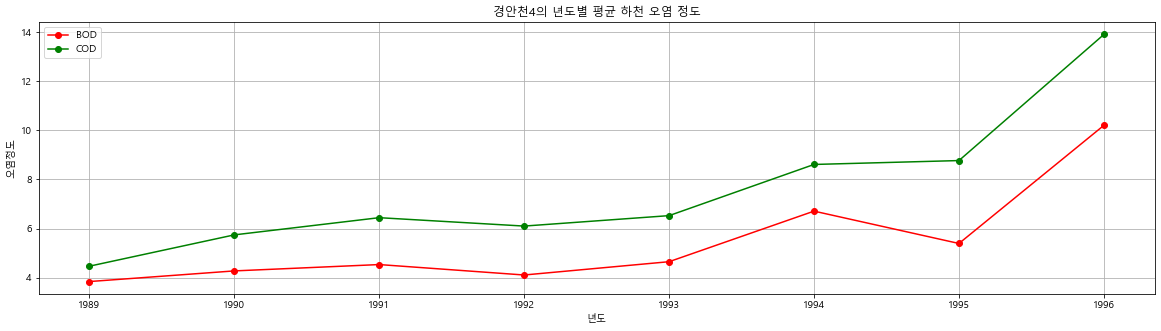

In [168]:
# 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [20, 5]

# data
# pollution_data = water[(water.항목명 == "생물학적산소요구량(BOD)") | (water.항목명 == "화학적산소요구량(COD)")] 
pollution_data = water[water.수질측정망명 == "경안천4"]
pollution_data
pollution_data.insert(8,"연도",pollution_data["검사일자"].astype("string").str[0:4])


BOD = pollution_data[pollution_data.항목명 == "생물학적산소요구량(BOD)"]
COD = pollution_data[pollution_data.항목명 == "화학적산소요구량(COD)"]
BOD = BOD.groupby("연도").mean().reset_index()
COD = COD.groupby("연도").mean().reset_index()
BOD_year = BOD.연도
COD_year = COD.연도


# 그래프
plt.plot(BOD_year,BOD.값,"o", c = "r", linestyle ="solid", label = "BOD")
plt.plot(COD_year,COD.값, "o", c = "g", linestyle ="solid", label = "COD")
plt.grid()
plt.title("경안천4의 년도별 평균 하천 오염 정도")
plt.xlabel("년도")
plt.ylabel("오염정도")
plt.legend()
plt.show()

### 4.1.2 하천 위치 지도 위 마커 표시하기

In [185]:
import folium
import webbrowser
import os

river_loc = water.iloc[:,[3,5,6]].drop_duplicates()
river_loc

river_map= folium.Map(location = [river_loc.위도[0],river_loc.경도[0]] ,zoom_start = 7)

# pd.iterrows()의 return값은 행의 번호와 행의 값
for i,row in river_loc.iterrows():
    folium.Marker(location = [row["위도"],row["경도"]],zoom_start = 7,
                 popup = row["수질측정망명"],icon = folium.Icon(color = "green", icon = "star")).add_to(river_map)
river_map.save("../output/river_map.html")
webbrowser.open("C:/Users/madda/Desktop/4학년2학기/데이터 기초 통계/output/river_map.html")

True

In [186]:
river_map

### 4.2.1 예방접종센터별 통계 및 그래프로 표기하기
- 데이터
    - 앞에서 사용한 covid_data.csv
1. 예방접종센터 지역별 센터수를 DataFrame 표시하기
2. 예방접종센터 지역별 센터수를 선그래프, 선+막대그래프, 원그래프로 표시하기


#### - 데이터 불러오기

In [201]:
center = pd.read_csv("../data/공공데이터활용지원센터_코로나19 예방접종센터 현황_20210716.csv", encoding = "cp949")
df = center
location = []
for word in center["주소"].str.split() :
    location.append(word[0])

    location2 = []
for word in center["주소"].str.split() :
    location2.append(word[1::])

for i in range(len(location)):
    location2[i].insert(0,location[i])

location_list = []
for i in range(len(location2)):
    loc = " ".join(location2[i])
    location_list.append(loc)


    
    
center["행정구역"] = location
# center["행정구역"].unique()
center["행정구역"] = center["행정구역"].replace('대구시',"대구광역시")
center["행정구역"] = center["행정구역"].replace('부산',"부산광역시")
center["행정구역"] = center["행정구역"].replace('울산시',"울산광역시")
center["행정구역"] = center["행정구역"].replace('충남',"충청남도")
center["행정구역"] = center["행정구역"].replace('전남',"전라남도")
center["행정구역"] = center["행정구역"].replace('경북',"경상북도")
center["행정구역"] = center["행정구역"].replace('경기',"경기도")
center["행정구역"] = center["행정구역"].replace('강원',"강원도")
center["행정구역"] = center["행정구역"].replace('전주시',"전라북도")
center["행정구역"] = center["행정구역"].replace('경남',"경상남도")
center["행정구역"] = center["행정구역"].replace('제주시',"제주특별자치도")


center["주소2"] = location_list
center["주소2"] = center["주소2"].str.replace('대구시',"대구광역시")
center["주소2"] = center["주소2"].str.replace('부산진구',"진구")
center["주소2"] = center["주소2"].str.replace("부산광역시","부산")
center["주소2"] = center["주소2"].str.replace('부산시',"부산")
center["주소2"] = center["주소2"].str.replace('부산',"부산광역시")
center["주소2"] = center["주소2"].str.replace('울산시',"울산광역시")
center["주소2"] = center["주소2"].str.replace('충남',"충청남도")
center["주소2"] = center["주소2"].str.replace('전남',"전라남도")
center["주소2"] = center["주소2"].str.replace('경북',"경상북도")
center["주소2"] = center["주소2"].str.replace('경기도',"경기")
center["주소2"] = center["주소2"].str.replace('경기',"경기도")
center["주소2"] = center["주소2"].str.replace('강원도',"강원")
center["주소2"] = center["주소2"].str.replace('강원',"강원도")
center["주소2"] = center["주소2"].str.replace('전주시',"전라북도 전주시")
center["주소2"] = center["주소2"].str.replace('경남',"경상남도")
center["주소2"] = center["주소2"].str.replace('제주시',"제주특별자치도") 
center = center[["연번","센터유형","센터명","운영기관","시설명","우편번호","행정구역","주소","주소2","사무실전화번호"]]
center

,연번,센터유형,센터명,운영기관,시설명,우편번호,행정구역,주소,주소2,사무실전화번호
0,1,중앙/권역,코로나19 중앙 예방접종센터,국립중앙의료원,국립중앙의료원 D동,4562,서울특별시,서울특별시 중구 을지로 39길 29,서울특별시 중구 을지로 39길 29,02-2260-7114
1,2,중앙/권역,코로나19 중부권역 예방접종센터,순천향대 천안병원,천안시 실내배드민턴장 1층,31212,충청남도,충청남도 천안시 동남구 천안대로 357,충청남도 천안시 동남구 천안대로 357,NaN
2,3,중앙/권역,코로나19 호남권역 예방접종센터,조선대병원,조선대학교병원 의성관 5층,61452,광주광역시,광주광역시 동구 필문대로 365,광주광역시 동구 필문대로 365,062-220-3739
3,4,중앙/권역,코로나19 영남권역 예방접종센터,양산 부산대병원,양산 부산대병원 기숙사동 1층,50612,경상남도,경상남도 양산시 물금읍 금오로 20,경상남도 양산시 물금읍 금오로 20,055-360-6701
4,5,지역,코로나19 대구광역시 중구 예방접종센터,NaN,계명대학교 대구동산병원 별관,41931,대구광역시,대구시 중구 달성로 56,대구광역시 중구 달성로 56,053-661-3955
...,...,...,...,...,...,...,...,...,...,...
279,280,지역,코로나19 충청북도 청주시 흥덕구 예방접종센터,NaN,(舊)흥덕구청,28426,충청북도,충청북도 청주시 흥덕구 대농로 88,충청북도 청주시 흥덕구 대농로 88,043-201-0999
280,281,지역,코로나19 경기도 파주시 예방접종센터,NaN,운정행복센터,10894,경기도,경기도 파주시 와석순환로 415,경기도 파주시 와석순환로 415,031-940-5597
281,282,지역,코로나19 경기도 남양주시 예방접종센터,NaN,화도체육문화센터,12178,경기도,경기도 남양주시 화도읍 수레로 1259,경기도 남양주시 화도읍 수레로 1259,031-590-2598
282,283,지역,코로나19 경기도 시흥시 예방접종센터,NaN,시흥국민체육센터,14976,경기도,경기도 시흥시 하중로 226,경기도 시흥시 하중로 226,031-310-6822


#### - 지역별 예방접종센터 수 df로 나타내기

In [215]:
center_count = center.행정구역.value_counts()
center_list = pd.DataFrame(center_count).T
center_list

,경기도,서울특별시,경상북도,전라남도,경상남도,강원도,충청남도,부산광역시,전라북도,충청북도,인천광역시,대구광역시,울산광역시,광주광역시,대전광역시,제주특별자치도,세종특별자치시
행정구역,51,43,24,23,22,18,17,16,15,14,12,9,6,6,5,2,1


#### - 예방접종센터 지역별 센터수를 선그래프, 선+막대그래프, 원그래프로 표시하기

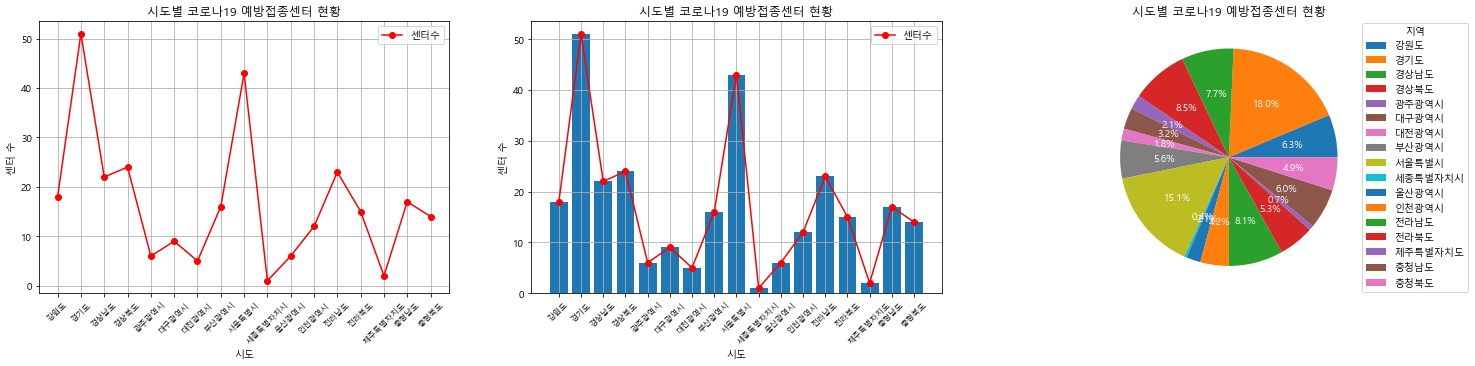

In [253]:
# 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (25, 5)
grid = plt.GridSpec(1,3)

# 데이터
center_count = pd.DataFrame(center_count)
center_count = center_count.sort_index()

# 그래프
## 선 그래프
x = center_count.index
y = center_count.행정구역
plt.subplot(grid[0,0]).plot(x,y,"o",c="r",linestyle = "solid", label = "센터수")
plt.grid()
plt.title("시도별 코로나19 예방접종센터 현황")
plt.xlabel("시도")
plt.ylabel("센터 수")
plt.xticks(rotation = 45, fontsize = 8)
plt.legend()

## 혼합 그래프
x = center_count.index
y = center_count.행정구역
plt.subplot(grid[0,1]).plot(x,y,"o",c="r",linestyle = "solid", label = "센터수")
plt.subplot(grid[0,1]).bar(x,y)
plt.grid()
plt.title("시도별 코로나19 예방접종센터 현황")
plt.xlabel("시도")
plt.ylabel("센터 수")
plt.xticks(rotation = 45, fontsize = 8)
plt.legend()

## 파이 그래프
idx = center_count.columns
val = center_count.행정구역
per = [ x/sum(val) * 100 for x in val]

plt.subplot(grid[0,2]).pie(per, autopct = "%1.1f%%", textprops = dict(color = "w") )
plt.title("시도별 코로나19 예방접종센터 현황")

# 범례
plt.legend(center_count.index, title = "지역", loc = "center right",bbox_to_anchor=(0.9,0,0.5,1))

plt.show()